In [87]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Period
# from power_predict.logic.registry import save_model, save_performance

# --- Fetching Data ---
df = pd.read_csv('/Users/FernandoSandoval/code/VonRiecken/Power-Predict/power_predict/data/merged_dataset2023-12-04 23:03:28.614514.csv')

In [88]:
# Ordinal Mapping function

ordinal_map = {
 Period('2010-01', 'M'): 1, Period('2010-02', 'M'): 2, Period('2010-03', 'M'): 3, Period('2010-04', 'M'): 4, Period('2010-05', 'M'): 5,
 Period('2010-06', 'M'): 6, Period('2010-07', 'M'): 7, Period('2010-08', 'M'): 8, Period('2010-09', 'M'): 9, Period('2010-10', 'M'): 10,
 Period('2010-11', 'M'): 11, Period('2010-12', 'M'): 12, Period('2011-01', 'M'): 13, Period('2011-02', 'M'): 14, Period('2011-03', 'M'): 15,
 Period('2011-04', 'M'): 16, Period('2011-05', 'M'): 17, Period('2011-06', 'M'): 18, Period('2011-07', 'M'): 19, Period('2011-08', 'M'): 20,
 Period('2011-09', 'M'): 21, Period('2011-10', 'M'): 22, Period('2011-11', 'M'): 23, Period('2011-12', 'M'): 24, Period('2012-01', 'M'): 25,
 Period('2012-02', 'M'): 26, Period('2012-03', 'M'): 27, Period('2012-04', 'M'): 28, Period('2012-05', 'M'): 29, Period('2012-06', 'M'): 30,
 Period('2012-07', 'M'): 31, Period('2012-08', 'M'): 32, Period('2012-09', 'M'): 33, Period('2012-10', 'M'): 34, Period('2012-11', 'M'): 35,
 Period('2012-12', 'M'): 36, Period('2013-01', 'M'): 37, Period('2013-02', 'M'): 38, Period('2013-03', 'M'): 39, Period('2013-04', 'M'): 40,
 Period('2013-05', 'M'): 41, Period('2013-06', 'M'): 42, Period('2013-07', 'M'): 43, Period('2013-08', 'M'): 44, Period('2013-09', 'M'): 45,
 Period('2013-10', 'M'): 46, Period('2013-11', 'M'): 47, Period('2013-12', 'M'): 48, Period('2014-01', 'M'): 49, Period('2014-02', 'M'): 50,
 Period('2014-03', 'M'): 51, Period('2014-04', 'M'): 52, Period('2014-05', 'M'): 53, Period('2014-06', 'M'): 54, Period('2014-07', 'M'): 55, 
 Period('2014-08', 'M'): 56, Period('2014-09', 'M'): 57, Period('2014-10', 'M'): 58, Period('2014-11', 'M'): 59,
 Period('2014-12', 'M'): 60, Period('2015-01', 'M'): 61, Period('2015-02', 'M'): 62, Period('2015-03', 'M'): 63, Period('2015-04', 'M'): 64,
 Period('2015-05', 'M'): 65, Period('2015-06', 'M'): 66, Period('2015-07', 'M'): 67, Period('2015-08', 'M'): 68, Period('2015-09', 'M'): 69,
 Period('2015-10', 'M'): 70, Period('2015-11', 'M'): 71, Period('2015-12', 'M'): 72, Period('2016-01', 'M'): 73, Period('2016-02', 'M'): 74,
 Period('2016-03', 'M'): 75, Period('2016-04', 'M'): 76, Period('2016-05', 'M'): 77, Period('2016-06', 'M'): 78, Period('2016-07', 'M'): 79,
 Period('2016-08', 'M'): 80, Period('2016-09', 'M'): 81, Period('2016-10', 'M'): 82, Period('2016-11', 'M'): 83, Period('2016-12', 'M'): 84,
 Period('2017-01', 'M'): 85, Period('2017-02', 'M'): 86, Period('2017-03', 'M'): 87, Period('2017-04', 'M'): 88, Period('2017-05', 'M'): 89, 
 Period('2017-06', 'M'): 90, Period('2017-07', 'M'): 91, Period('2017-08', 'M'): 92, Period('2017-09', 'M'): 93,
 Period('2017-10', 'M'): 94, Period('2017-11', 'M'): 95, Period('2017-12', 'M'): 96, Period('2018-01', 'M'): 97, Period('2018-02', 'M'): 98,
 Period('2018-03', 'M'): 99, Period('2018-04', 'M'): 100, Period('2018-05', 'M'): 101, Period('2018-06', 'M'): 102, Period('2018-07', 'M'): 103,
 Period('2018-08', 'M'): 104, Period('2018-09', 'M'): 105, Period('2018-10', 'M'): 106, Period('2018-11', 'M'): 107, Period('2018-12', 'M'): 108,
 Period('2019-01', 'M'): 109, Period('2019-02', 'M'): 110, Period('2019-03', 'M'): 111, Period('2019-04', 'M'): 112, Period('2019-05', 'M'): 113,
 Period('2019-06', 'M'): 114, Period('2019-07', 'M'): 115, Period('2019-08', 'M'): 116, Period('2019-09', 'M'): 117, Period('2019-10', 'M'): 118,
 Period('2019-11', 'M'): 119, Period('2019-12', 'M'): 120, Period('2020-01', 'M'): 121, Period('2020-02', 'M'): 122, Period('2020-03', 'M'): 123,
 Period('2020-04', 'M'): 124, Period('2020-05', 'M'): 125, Period('2020-06', 'M'): 126, Period('2020-07', 'M'): 127, Period('2020-08', 'M'): 128,
 Period('2020-09', 'M'): 129, Period('2020-10', 'M'): 130, Period('2020-11', 'M'): 131, Period('2020-12', 'M'): 132, Period('2021-01', 'M'): 133,
 Period('2021-02', 'M'): 134, Period('2021-03', 'M'): 135, Period('2021-04', 'M'): 136, Period('2021-05', 'M'): 137, Period('2021-06', 'M'): 138,
 Period('2021-07', 'M'): 139, Period('2021-08', 'M'): 140, Period('2021-09', 'M'): 141, Period('2021-10', 'M'): 142, Period('2021-11', 'M'): 143,
 Period('2021-12', 'M'): 144, Period('2022-01', 'M'): 145, Period('2022-02', 'M'): 146, Period('2022-03', 'M'): 147, Period('2022-04', 'M'): 148,
 Period('2022-05', 'M'): 149, Period('2022-06', 'M'): 150, Period('2022-07', 'M'): 151, Period('2022-08', 'M'): 152, Period('2022-09', 'M'): 153,
 Period('2022-10', 'M'): 154, Period('2022-11', 'M'): 155, Period('2022-12', 'M'): 156, Period('2023-01', 'M'): 157, Period('2023-02', 'M'): 158,
 Period('2023-03', 'M'): 159, Period('2023-04', 'M'): 160, Period('2023-05', 'M'): 161, Period('2023-06', 'M'): 162, Period('2023-07', 'M'): 163,
 Period('2023-08', 'M'): 164, Period('2023-09', 'M'): 165, Period('2023-10', 'M'): 166, Period('2023-11', 'M'): 167, Period('2023-12', 'M'): 168,
 Period('2024-01', 'M'): 169, Period('2024-02', 'M'): 170, Period('2024-03', 'M'): 171, Period('2024-04', 'M'): 172, Period('2024-05', 'M'): 173,
 Period('2024-06', 'M'): 174, Period('2024-07', 'M'): 175, Period('2024-08', 'M'): 176, Period('2024-09', 'M'): 177, Period('2024-10', 'M'): 178,
 Period('2024-11', 'M'): 179, Period('2024-12', 'M'): 180, Period('2025-01', 'M'): 181, Period('2025-02', 'M'): 182, Period('2025-03', 'M'): 183,
 Period('2025-04', 'M'): 184, Period('2025-05', 'M'): 185, Period('2025-06', 'M'): 186, Period('2025-07', 'M'): 187, Period('2025-08', 'M'): 188,
 Period('2025-09', 'M'): 189, Period('2025-10', 'M'): 190, Period('2025-11', 'M'): 191, Period('2025-12', 'M'): 192, Period('2026-01', 'M'): 193,
 Period('2026-02', 'M'): 194, Period('2026-03', 'M'): 195, Period('2026-04', 'M'): 196, Period('2026-05', 'M'): 197, Period('2026-06', 'M'): 198,
 Period('2026-07', 'M'): 199, Period('2026-08', 'M'): 200, Period('2026-09', 'M'): 201, Period('2026-10', 'M'): 202, Period('2026-11', 'M'): 203,
 Period('2026-12', 'M'): 204, Period('2027-01', 'M'): 205, Period('2027-02', 'M'): 206, Period('2027-03', 'M'): 207, Period('2027-04', 'M'): 208,
 Period('2027-05', 'M'): 209, Period('2027-06', 'M'): 210, Period('2027-07', 'M'): 211, Period('2027-08', 'M'): 212, Period('2027-09', 'M'): 213,
 Period('2027-10', 'M'): 214, Period('2027-11', 'M'): 215, Period('2027-12', 'M'): 216, Period('2028-01', 'M'): 217, Period('2028-02', 'M'): 218,
 Period('2028-03', 'M'): 219, Period('2028-04', 'M'): 220, Period('2028-05', 'M'): 221, Period('2028-06', 'M'): 222, Period('2028-07', 'M'): 223,
 Period('2028-08', 'M'): 224, Period('2028-09', 'M'): 225, Period('2028-10', 'M'): 226, Period('2028-11', 'M'): 227, Period('2028-12', 'M'): 228,
 Period('2029-01', 'M'): 229, Period('2029-02', 'M'): 230, Period('2029-03', 'M'): 231, Period('2029-04', 'M'): 232, Period('2029-05', 'M'): 233,
 Period('2029-06', 'M'): 234, Period('2029-07', 'M'): 235, Period('2029-08', 'M'): 236, Period('2029-09', 'M'): 237, Period('2029-10', 'M'): 238,
 Period('2029-11', 'M'): 239, Period('2029-12', 'M'): 240}

def ordinal_mapping(date):
    # Convert date to Period object in 'M' frequency
    period_date = pd.Period(date, freq='M')
    
    # Return the ordinal value if the date is in the map, else return None
    return ordinal_map.get(period_date)

df['ordinal_month'] = df['Month_year'].apply(ordinal_mapping)

df

,Unnamed: 0,Month_year,Country,Balance,Combustible_Renewables,Hydro,Other_Renewables,Solar,Total_Renewables__Hydro__Geo__Solar__Wind__Other_,Wind,...,value_CDD_21,value_Global_Horizontal_Irrandiance,value_HDD_16,value_HDD_18,value_Heat_index,value_Relative_Humidty,value_Temperature,value_Total_Precipitation,total_sol_wind_hyd,ordinal_month
0,0,2010-04-01,Australia,Net Electricity Production,216.2870,1044.4060,0.0000,26.8110,1638.0980,350.5110,...,12.620000,720994.0,17.470,37.08,18.410,57.37,23.210,0.05483,1421.7280,4
1,1,2010-04-01,Austria,Net Electricity Production,350.3830,2504.1300,0.0000,9.9650,2995.6960,131.1070,...,0.000000,736161.0,228.900,287.80,8.410,69.85,6.748,0.10510,2645.2020,4
2,2,2010-04-01,Belgium,Net Electricity Production,383.1770,141.8980,0.0000,80.4190,702.5090,97.0150,...,0.000000,723195.0,195.800,253.70,9.577,67.90,9.322,0.03999,319.3320,4
3,3,2010-04-01,Canada,Net Electricity Production,712.9880,28243.7380,2.4400,24.1840,29709.3010,725.9510,...,0.000023,679927.0,246.700,306.20,7.797,70.85,-1.708,0.05456,28993.8730,4
4,4,2010-04-01,Chile,Net Electricity Production,152.8260,1740.4160,0.0000,0.0000,1913.6010,20.3590,...,0.040190,578355.0,113.000,168.30,12.440,66.58,9.672,0.15780,1760.7750,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6713,6713,2022-09-01,Spain,Net Electricity Production,478.4796,1459.6225,1.5000,3213.8391,9351.9487,4198.5075,...,48.410000,748831.0,5.679,13.65,21.360,60.24,20.190,0.06919,8871.9691,153
6714,6714,2022-09-01,Sweden,Net Electricity Production,819.7182,5992.2339,0.0000,101.3747,8900.2441,1986.9173,...,0.000000,314577.0,137.000,197.00,11.430,80.39,9.229,0.09243,8080.5259,153
6715,6715,2022-09-01,Switzerland,Net Electricity Production,173.8267,2753.3512,0.0000,337.7122,3276.0098,11.1196,...,0.000000,565099.0,109.400,157.60,12.880,79.31,10.330,0.24790,3102.1830,153
6716,6716,2022-09-01,United Kingdom,Net Electricity Production,3122.6177,367.4721,0.4559,1385.7783,10397.5687,5521.2446,...,0.000000,422664.0,65.670,113.30,14.320,80.52,13.800,0.14530,7274.4950,153


In [68]:
# --- Data Preprocessing ---

#### --- Adding Ordinal Month Column --- ####
# Ensure Month_year is in a proper format and convert to datetime
df['Month_year'] = pd.to_datetime(df['Month_year'].astype(str)).dt.to_period('M')

# Get the sorted unique months as a list
unique_months = sorted(df['Month_year'].unique())

# Create an ordinal encoding mapping
ordinal_mapping = {month: i+1 for i, month in enumerate(unique_months)}

# Map the ordinal encoding to the dataset
df['ordinal_month'] = df['Month_year'].map(ordinal_mapping)

# Check the first few rows to verify
df.head(5)

ordinal_mapping

# df['ordinal_months'].describe()
# df['ordinal_months'].value_counts()


# Setting Country + Month year as Index
df['Country_Month'] = df['Country'] + '_' + df['Month_year'].astype(str)
df = df.set_index('Country_Month')

# Separating features and target variables
X = df.drop(['Unnamed: 0', 'Month_year', 'Balance',
             'Combustible_Renewables', 'Hydro', 'Other_Renewables', 'Solar',
             'Total_Renewables__Hydro__Geo__Solar__Wind__Other_', 'Wind',
             'total_sol_wind_hyd', 'value_CDD_18', 'value_CDD_21',
             'value_HDD_16', 'value_HDD_18', 'value_Heat_index',], axis=1)

# Applying logistic (log) transformation to the target variables
y = np.log1p(df[['Hydro', 'Solar', 'Wind', 'total_sol_wind_hyd']])

In [79]:
# type(ordinal_mapping)
ordinal_mapping



{Period('2010-01', 'M'): 1,
 Period('2010-02', 'M'): 2,
 Period('2010-03', 'M'): 3,
 Period('2010-04', 'M'): 4,
 Period('2010-05', 'M'): 5,
 Period('2010-06', 'M'): 6,
 Period('2010-07', 'M'): 7,
 Period('2010-08', 'M'): 8,
 Period('2010-09', 'M'): 9,
 Period('2010-10', 'M'): 10,
 Period('2010-11', 'M'): 11,
 Period('2010-12', 'M'): 12,
 Period('2011-01', 'M'): 13,
 Period('2011-02', 'M'): 14,
 Period('2011-03', 'M'): 15,
 Period('2011-04', 'M'): 16,
 Period('2011-05', 'M'): 17,
 Period('2011-06', 'M'): 18,
 Period('2011-07', 'M'): 19,
 Period('2011-08', 'M'): 20,
 Period('2011-09', 'M'): 21,
 Period('2011-10', 'M'): 22,
 Period('2011-11', 'M'): 23,
 Period('2011-12', 'M'): 24,
 Period('2012-01', 'M'): 25,
 Period('2012-02', 'M'): 26,
 Period('2012-03', 'M'): 27,
 Period('2012-04', 'M'): 28,
 Period('2012-05', 'M'): 29,
 Period('2012-06', 'M'): 30,
 Period('2012-07', 'M'): 31,
 Period('2012-08', 'M'): 32,
 Period('2012-09', 'M'): 33,
 Period('2012-10', 'M'): 34,
 Period('2012-11', 'M')

In [69]:
# Init list of numerical columns

num_features = [col for col in X.select_dtypes(include=[np.number]).columns if col != 'ordinal_months'] # don't include ordinal months!

# Custom scaler function for 'ordinal_months'
def custom_scaler(om):
    om_scaled = (om - 1) / (240 - 1)  # scale from 0 to 1 with max value 240
    return om_scaled
    
# Create a transformer for the custom scalinga
custom_scaler_transformer = FunctionTransformer(np.vectorize(custom_scaler), validate=False)

# Preprocessing pipeline
preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('scaler', MinMaxScaler())]), num_features),
        ('ordinal_month', Pipeline(steps=[('custom_scaler', custom_scaler_transformer)]), ['ordinal_month']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Country'])
    ])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# --- Create Model Training ---
# KNeighborsRegressor with Polynomial Features wrapped in MultiOutputRegressor
polynomial_features = PolynomialFeatures(degree=2)
multi_knn_regressor = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=20, p=2, weights='uniform'))

# Pipeline including preprocessing, polynomial feature generation, and multi-output Polynomial Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('poly_features', polynomial_features),
    ('multi_knn_regressor', multi_knn_regressor)
])

In [71]:
# --- 5-Fold Cross-Validation ---
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
mean_cv_score = np.mean(cv_scores)
print(f"Cross-validated scores for 5 folds on the training data: {cv_scores}")
print(f"Mean CV Score: {mean_cv_score}")

Cross-validated scores for 5 folds on the training data: [0.97772823 0.98260968 0.9713543  0.97881702 0.97936278]
Mean CV Score: 0.9779744007748918


In [72]:
# --- Model Training ---
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['value_Global_Horizontal_Irrandiance',
                                                   'value_Relative_Humidty',
                                                   'value_Temperature',
                                                   'value_Total_Precipitation',
                                                   'ordinal_month']),
                                                 ('ordinal_month',
                                                  Pipeline(steps=[('custom_scaler',
                                                                   FunctionTransformer(func=<numpy.vectorize object at 0x12bca4e50>))]),
                                                  ['ordinal_month']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Country'])])),
                ('poly_features', PolynomialFeatures()),
                ('multi_knn_regressor',
                 MultiOutputRegressor(estimator=KNeighborsRegressor(n_neighbors=20)))])

In [73]:
# --- Model Evaluation ---
# Evaluate the model
y_pred = pipeline.predict(X_test)  # X_test will be automatically preprocessed by the pipeline

# Inverse log transformation of the predictions
y_pred = np.expm1(y_pred)

In [74]:
# --- Save Model ---
    # Save fitted pipeline model as 'knn_log'
# save_model(pipeline, 'knn_log')

# --- Save Params and Metrics ---
    # Save params from fitted pipeline into a dict 'params'
params = pipeline.named_steps['multi_knn_regressor'].get_params()

# Define performace metrics
    # Initialize an empty dictionary to store metrics
metrics = {}
for i, target in enumerate(['Hydro', 'Solar', 'Wind', 'total_sol_wind_hyd']):
    mse = mean_squared_error(np.expm1(y_test.iloc[:, i]), y_pred[:, i])
    mae = mean_absolute_error(np.expm1(y_test.iloc[:, i]), y_pred[:, i])
    r2 = r2_score(np.expm1(y_test.iloc[:, i]), y_pred[:, i])
    rmse = np.sqrt(mse)

    # Store metrics in the dictionary
    metrics[target] = {
        'Mean CV Score': mean_cv_score,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    }

    # Call save_performace function in registry.py to save dicts with a time stamp in the correct file
# save_performance('knn_log', params, metrics)

In [75]:
for target, metrics_values in metrics.items():
    print(f"Metrics for {target}:")
    for metric_name, metric_value in metrics_values.items():
        print(f"    {metric_name}: {metric_value:.4f}")
    print("\n")

Metrics for Hydro:
    Mean CV Score: 0.9780
    Mean Absolute Error: 533.7560
    Mean Squared Error: 3751287.0132
    Root Mean Squared Error: 1936.8239
    R-squared: 0.9795


Metrics for Solar:
    Mean CV Score: 0.9780
    Mean Absolute Error: 153.0331
    Mean Squared Error: 498292.3181
    Root Mean Squared Error: 705.8982
    R-squared: 0.9350


Metrics for Wind:
    Mean CV Score: 0.9780
    Mean Absolute Error: 331.1642
    Mean Squared Error: 1785543.9632
    Root Mean Squared Error: 1336.2425
    R-squared: 0.9374


Metrics for total_sol_wind_hyd:
    Mean CV Score: 0.9780
    Mean Absolute Error: 750.9459
    Mean Squared Error: 7636544.6745
    Root Mean Squared Error: 2763.4299
    R-squared: 0.9806




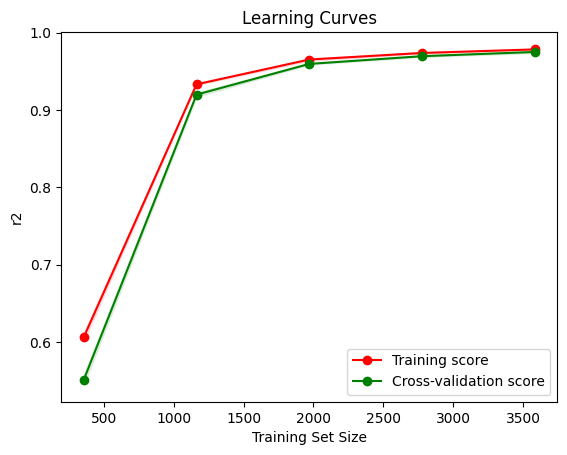

In [76]:
# Learning Curves

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = pipeline,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 5),  # Reduced number of training sizes
    cv = 3,  # Reduced number of folds
    scoring = 'r2'
)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training Set Size")
plt.ylabel("r2")
plt.legend(loc="best")
plt.show()